# K-Means DSDP Facies
##### Resources: https://www.youtube.com/watch?v=iNlZ3IU5Ffw

In [1]:

import numpy as np
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from PIL import Image
import os
from sklearn.preprocessing import StandardScaler



In [2]:
# Load data
df = pd.read_csv("seismic_data.csv")
df = df[df['Y'] < 750]
df = df[df['X'] < 6000]
df
# plot seismic profile side by side with scatter plot

,Unnamed: 0,X,Y,local_structural_dip,RMS_amplitude,generalized_spectral_decomposition,variance,flatness,dominant_freq,seismic_profile,...,flatness.1,dominant_freq.1,seismic_profile.1,first_derivative.1,instantaneous_phase.1,instantaneous_freq.1,amplitude_contrast.1,chaos.1,iso_freq_54hz.1,gradient_magnitude.1
0,0,0,0,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,-2.220446e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,1,0,1,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,-2.220446e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,2,0,2,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,-2.220446e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
3,3,0,3,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,-2.220446e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4,4,0,4,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,-2.220446e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648970,10648970,5999,745,2.060998,2627.663818,1400.119019,0.476244,1.853220e-02,53.540314,-2743.110352,...,1.853220e-02,53.540314,-2743.110352,-3835.782227,147.774445,35.584114,0.314460,0.493862,0.825238,3838.265137
10648971,10648971,5999,746,21.885452,2672.695312,1054.900757,0.410524,1.671768e-02,36.112961,-5157.046875,...,1.671768e-02,36.112961,-5157.046875,1769.306152,-148.738098,33.492085,0.297486,0.414185,0.870316,1906.721802
10648972,10648972,5999,747,3.512580,3263.631836,35.175751,0.342731,1.742359e-02,30.569235,219.448730,...,1.742359e-02,30.569235,219.448730,4978.745117,-88.138184,29.408802,0.277898,0.397889,0.746862,4988.115723
10648973,10648973,5999,748,81.489120,3460.582520,0.000000,0.296446,1.981911e-02,30.193789,2907.696777,...,1.981911e-02,30.193789,2907.696777,411.467133,-43.093159,24.045494,0.258934,0.427660,0.668841,2780.234863


In [3]:
df.describe()

,Unnamed: 0,X,Y,local_structural_dip,RMS_amplitude,generalized_spectral_decomposition,variance,flatness,dominant_freq,seismic_profile,...,flatness.1,dominant_freq.1,seismic_profile.1,first_derivative.1,instantaneous_phase.1,instantaneous_freq.1,amplitude_contrast.1,chaos.1,iso_freq_54hz.1,gradient_magnitude.1
count,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,...,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06
mean,5.324487e+06,2.999500e+03,3.745000e+02,3.411659e+01,1.680659e+03,5.811883e+02,2.581178e-01,5.792009e-02,3.014231e+01,5.887535e-01,...,5.792009e-02,3.014231e+01,5.887535e-01,1.150862e-01,-8.110821e-02,2.534022e+01,2.987006e-01,4.549296e-01,4.676781e-01,1.483615e+03
std,3.074390e+06,1.732051e+03,2.165062e+02,2.733945e+01,8.691487e+02,6.922884e+02,2.094709e-01,1.017206e-01,1.672250e+01,1.891359e+03,...,1.017206e-01,1.672250e+01,1.891359e+03,1.480124e+03,9.900643e+01,1.282620e+01,1.209648e-01,2.786325e-01,3.145706e-01,1.102530e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.220446e-16,0.000000e+00,-1.470642e+04,...,-2.220446e-16,0.000000e+00,-1.470642e+04,-1.798533e+04,-1.799996e+02,-6.387059e+01,0.000000e+00,0.000000e+00,-5.880329e-01,0.000000e+00
25%,2.662244e+06,1.499750e+03,1.870000e+02,9.274021e+00,1.254819e+03,0.000000e+00,7.937758e-02,4.656446e-03,2.111909e+01,-1.128653e+03,...,4.656446e-03,2.111909e+01,-1.128653e+03,-8.480611e+02,-8.308845e+01,1.833489e+01,2.687842e-01,2.398546e-01,2.160942e-01,6.766891e+02
50%,5.324487e+06,2.999500e+03,3.745000e+02,2.947975e+01,1.710875e+03,3.562115e+02,2.178626e-01,2.129429e-02,3.021815e+01,0.000000e+00,...,2.129429e-02,3.021815e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.599451e+01,3.224853e-01,4.135137e-01,4.868237e-01,1.336761e+03
75%,7.986730e+06,4.499250e+03,5.620000e+02,5.633084e+01,2.184764e+03,9.598748e+02,4.033927e-01,6.439079e-02,4.050958e+01,1.109071e+03,...,6.439079e-02,4.050958e+01,1.109071e+03,8.485840e+02,8.241757e+01,3.438045e+01,3.733258e-01,6.220725e-01,7.398541e-01,2.117880e+03
max,1.064897e+07,5.999000e+03,7.490000e+02,9.000000e+01,1.092965e+04,1.046428e+04,1.000000e+00,9.912980e-01,2.569689e+03,1.884524e+04,...,9.912980e-01,2.569689e+03,1.884524e+04,1.452846e+04,1.799999e+02,1.621419e+02,6.943212e-01,1.000000e+00,9.999930e-01,1.993145e+04


In [4]:
scaler = StandardScaler()
df[['seismic_profile_T', 'RMS_amplitude_T', 'generalized_spectral_decomposition_T', 'first_derivative_T']] = scaler.fit_transform(df[['seismic_profile', 'RMS_amplitude', 'generalized_spectral_decomposition', 'first_derivative']])

In [5]:
df

,Unnamed: 0,X,Y,local_structural_dip,RMS_amplitude,generalized_spectral_decomposition,variance,flatness,dominant_freq,seismic_profile,...,instantaneous_phase.1,instantaneous_freq.1,amplitude_contrast.1,chaos.1,iso_freq_54hz.1,gradient_magnitude.1,seismic_profile_T,RMS_amplitude_T,generalized_spectral_decomposition_T,first_derivative_T
0,0,0,0,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078
1,1,0,1,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078
2,2,0,2,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078
3,3,0,3,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078
4,4,0,4,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648970,10648970,5999,745,2.060998,2627.663818,1400.119019,0.476244,1.853220e-02,53.540314,-2743.110352,...,147.774445,35.584114,0.314460,0.493862,0.825238,3838.265137,-1.450650,1.089578,1.182933,-2.591606
10648971,10648971,5999,746,21.885452,2672.695312,1054.900757,0.410524,1.671768e-02,36.112961,-5157.046875,...,-148.738098,33.492085,0.297486,0.414185,0.870316,1906.721802,-2.726947,1.141389,0.684270,1.195299
10648972,10648972,5999,747,3.512580,3263.631836,35.175751,0.342731,1.742359e-02,30.569235,219.448730,...,-88.138184,29.408802,0.277898,0.397889,0.746862,4988.115723,0.115716,1.821291,-0.788707,3.363658
10648973,10648973,5999,748,81.489120,3460.582520,0.000000,0.296446,1.981911e-02,30.193789,2907.696777,...,-43.093159,24.045494,0.258934,0.427660,0.668841,2780.234863,1.537047,2.047893,-0.839518,0.277917


In [6]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []

    for k in np.arange(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Intertia')
    plt.grid(True)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

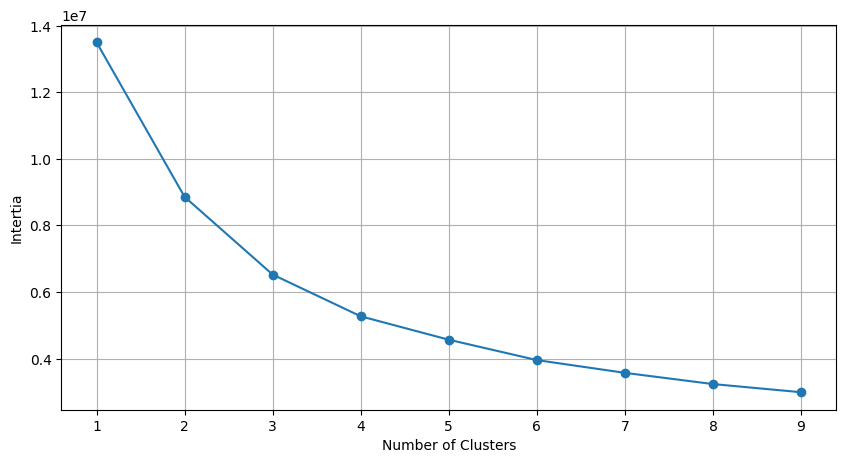

In [7]:
optimize_k_means(data=df[['RMS_amplitude_T', 'generalized_spectral_decomposition_T', 'first_derivative_T']], max_k=10)

In [8]:
k_means_input_data = df[['RMS_amplitude_T', 'generalized_spectral_decomposition_T', 'first_derivative_T']]

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(k_means_input_data)
df['kmeans_3'] = kmeans.labels_
df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Unnamed: 0,X,Y,local_structural_dip,RMS_amplitude,generalized_spectral_decomposition,variance,flatness,dominant_freq,seismic_profile,...,instantaneous_freq.1,amplitude_contrast.1,chaos.1,iso_freq_54hz.1,gradient_magnitude.1,seismic_profile_T,RMS_amplitude_T,generalized_spectral_decomposition_T,first_derivative_T,kmeans_3
0,0,0,0,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1
1,1,0,1,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1
2,2,0,2,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1
3,3,0,3,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1
4,4,0,4,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648970,10648970,5999,745,2.060998,2627.663818,1400.119019,0.476244,1.853220e-02,53.540314,-2743.110352,...,35.584114,0.314460,0.493862,0.825238,3838.265137,-1.450650,1.089578,1.182933,-2.591606,2
10648971,10648971,5999,746,21.885452,2672.695312,1054.900757,0.410524,1.671768e-02,36.112961,-5157.046875,...,33.492085,0.297486,0.414185,0.870316,1906.721802,-2.726947,1.141389,0.684270,1.195299,0
10648972,10648972,5999,747,3.512580,3263.631836,35.175751,0.342731,1.742359e-02,30.569235,219.448730,...,29.408802,0.277898,0.397889,0.746862,4988.115723,0.115716,1.821291,-0.788707,3.363658,0
10648973,10648973,5999,748,81.489120,3460.582520,0.000000,0.296446,1.981911e-02,30.193789,2907.696777,...,24.045494,0.258934,0.427660,0.668841,2780.234863,1.537047,2.047893,-0.839518,0.277917,0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


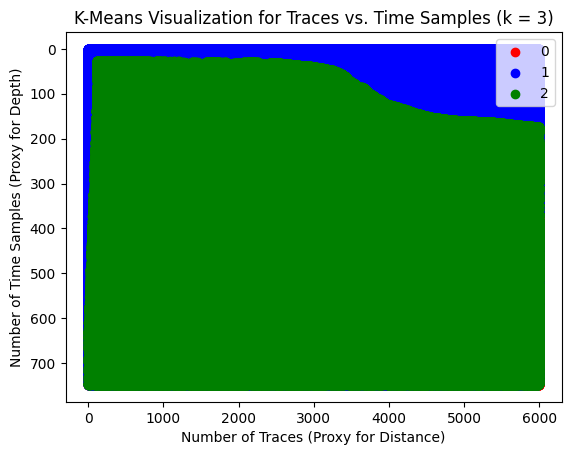

In [10]:
colors = ['red', 'blue', 'green', 'yellow']
for i in np.arange(3):
  k_means_3_filtered = df[df['kmeans_3'] == i]
  plt.scatter(x=k_means_3_filtered['X'], y=k_means_3_filtered['Y'], color=colors[i], label=i)
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("Number of Traces (Proxy for Distance)")
plt.ylabel("Number of Time Samples (Proxy for Depth)")
plt.title("K-Means Visualization for Traces vs. Time Samples (k = 3)")
plt.show()

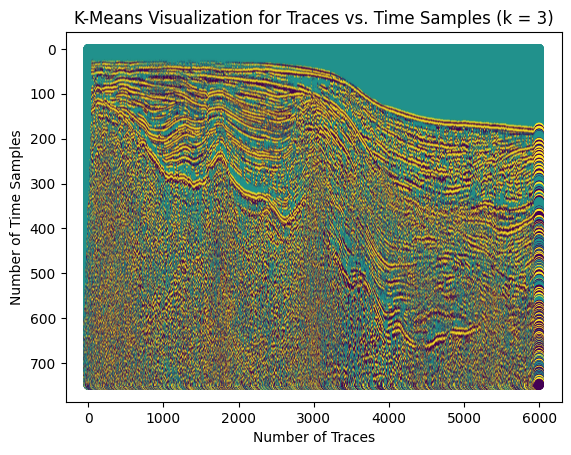

In [16]:
plt.scatter(x=df['X'], y=df['Y'], c=df['kmeans_3'])
plt.gca().invert_yaxis()
plt.xlabel("Number of Traces")
plt.ylabel("Number of Time Samples")
plt.title("K-Means Visualization for Traces vs. Time Samples (k = 3)")
plt.show()
# Why? Much faster than interpreting by hand, objective
# Trying to take attributes of a seismic profile to use ML to predict geologic characteristics of the profile
# Ideally, groupings of geologic meanings

In [11]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(k_means_input_data)
df['kmeans_4'] = kmeans.labels_
df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Unnamed: 0,X,Y,local_structural_dip,RMS_amplitude,generalized_spectral_decomposition,variance,flatness,dominant_freq,seismic_profile,...,amplitude_contrast.1,chaos.1,iso_freq_54hz.1,gradient_magnitude.1,seismic_profile_T,RMS_amplitude_T,generalized_spectral_decomposition_T,first_derivative_T,kmeans_3,kmeans_4
0,0,0,0,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1,3
1,1,0,1,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1,3
2,2,0,2,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1,3
3,3,0,3,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1,3
4,4,0,4,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648970,10648970,5999,745,2.060998,2627.663818,1400.119019,0.476244,1.853220e-02,53.540314,-2743.110352,...,0.314460,0.493862,0.825238,3838.265137,-1.450650,1.089578,1.182933,-2.591606,2,0
10648971,10648971,5999,746,21.885452,2672.695312,1054.900757,0.410524,1.671768e-02,36.112961,-5157.046875,...,0.297486,0.414185,0.870316,1906.721802,-2.726947,1.141389,0.684270,1.195299,0,2
10648972,10648972,5999,747,3.512580,3263.631836,35.175751,0.342731,1.742359e-02,30.569235,219.448730,...,0.277898,0.397889,0.746862,4988.115723,0.115716,1.821291,-0.788707,3.363658,0,2
10648973,10648973,5999,748,81.489120,3460.582520,0.000000,0.296446,1.981911e-02,30.193789,2907.696777,...,0.258934,0.427660,0.668841,2780.234863,1.537047,2.047893,-0.839518,0.277917,0,2


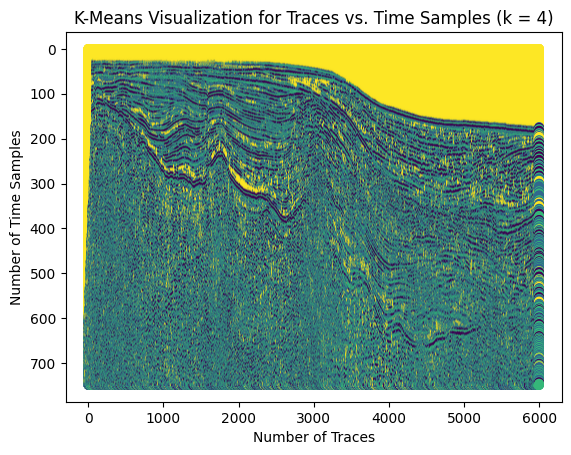

In [13]:
plt.scatter(x=df['X'], y=df['Y'], c=df['kmeans_4'])
plt.gca().invert_yaxis()
plt.xlabel("Number of Traces")
plt.ylabel("Number of Time Samples")
plt.title("K-Means Visualization for Traces vs. Time Samples (k = 4)")
plt.show()

In [21]:
for k in np.arange(1, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(k_means_input_data)
    df[f'KMeans_{k}'] = kmeans.labels_


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

In [18]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(k_means_input_data)
df['kmeans_2'] = kmeans.labels_
df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Unnamed: 0,X,Y,local_structural_dip,RMS_amplitude,generalized_spectral_decomposition,variance,flatness,dominant_freq,seismic_profile,...,chaos.1,iso_freq_54hz.1,gradient_magnitude.1,seismic_profile_T,RMS_amplitude_T,generalized_spectral_decomposition_T,first_derivative_T,kmeans_3,kmeans_4,kmeans_2
0,0,0,0,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1,3,0
1,1,0,1,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1,3,0
2,2,0,2,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1,3,0
3,3,0,3,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1,3,0
4,4,0,4,0.000000,0.000000,0.000000,0.000000,-2.220446e-16,0.000000,0.000000,...,1.000000,0.000000,0.000000,-0.000311,-1.933684,-0.839518,-0.000078,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648970,10648970,5999,745,2.060998,2627.663818,1400.119019,0.476244,1.853220e-02,53.540314,-2743.110352,...,0.493862,0.825238,3838.265137,-1.450650,1.089578,1.182933,-2.591606,2,0,1
10648971,10648971,5999,746,21.885452,2672.695312,1054.900757,0.410524,1.671768e-02,36.112961,-5157.046875,...,0.414185,0.870316,1906.721802,-2.726947,1.141389,0.684270,1.195299,0,2,0
10648972,10648972,5999,747,3.512580,3263.631836,35.175751,0.342731,1.742359e-02,30.569235,219.448730,...,0.397889,0.746862,4988.115723,0.115716,1.821291,-0.788707,3.363658,0,2,0
10648973,10648973,5999,748,81.489120,3460.582520,0.000000,0.296446,1.981911e-02,30.193789,2907.696777,...,0.427660,0.668841,2780.234863,1.537047,2.047893,-0.839518,0.277917,0,2,0


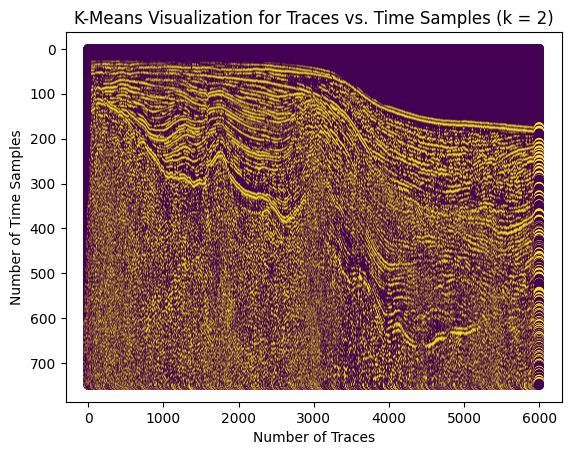

In [19]:
plt.scatter(x=df['X'], y=df['Y'], c=df['kmeans_2'])
plt.gca().invert_yaxis()
plt.xlabel("Number of Traces")
plt.ylabel("Number of Time Samples")
plt.title("K-Means Visualization for Traces vs. Time Samples (k = 2)")
plt.show()

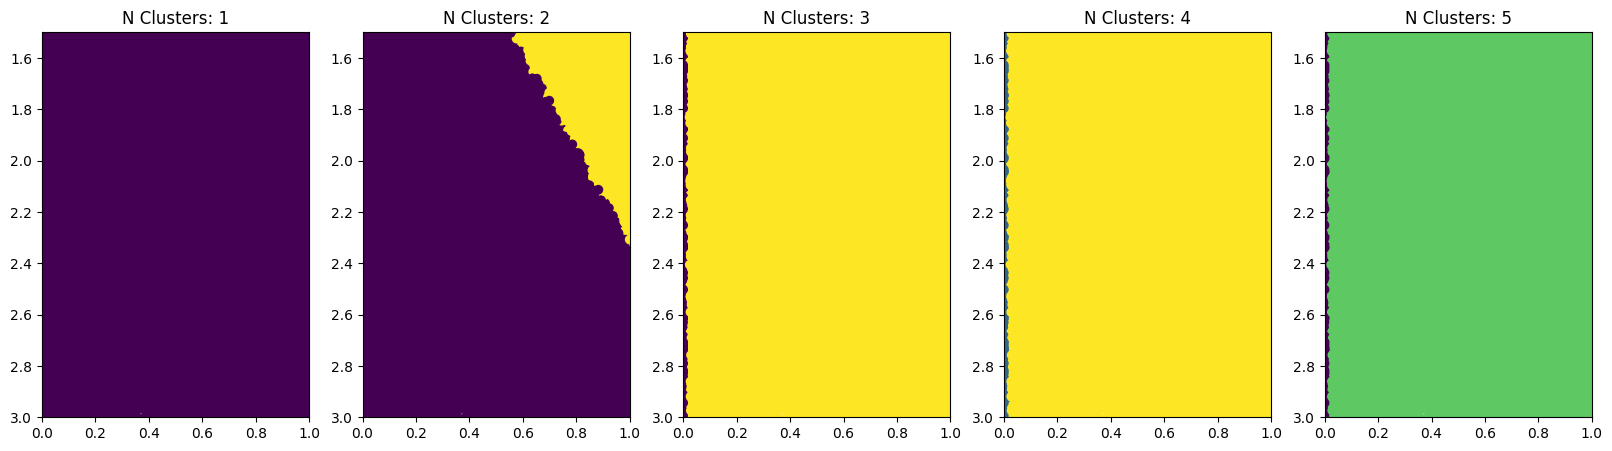

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['seismic_profile_T'], y=df['RMS_amplitude_T'], c=df[f'KMeans_{i}'])
    ax.set_ylim(3, 1.5)
    ax.set_xlim(0, 1)
    ax.set_title(f'N Clusters: {i}')

In [24]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['seismic_profile_T', 'RMS_amplitude_T']])
df['kmeans_2'] = kmeans.labels_
df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Unnamed: 0,X,Y,local_structural_dip,RMS_amplitude,generalized_spectral_decomposition,variance,flatness,dominant_freq,seismic_profile,...,seismic_profile_T,RMS_amplitude_T,kmeans_3,kmeans_4,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,kmeans_2
0,0,0,0,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,...,-0.000313,-2.196037,1,0,0,1,1,0,1,1
1,1,0,1,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,...,-0.000313,-2.196037,1,0,0,1,1,0,1,1
2,2,0,2,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,...,-0.000313,-2.196037,1,0,0,1,1,0,1,1
3,3,0,3,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,...,-0.000313,-2.196037,1,0,0,1,1,0,1,1
4,4,0,4,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,...,-0.000313,-2.196037,1,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11040495,11040495,6219,1770,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,...,-0.000313,-2.196037,1,0,0,1,1,0,1,1
11040496,11040496,6219,1771,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,...,-0.000313,-2.196037,1,0,0,1,1,0,1,1
11040497,11040497,6219,1772,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,...,-0.000313,-2.196037,1,0,0,1,1,0,1,1
11040498,11040498,6219,1773,0.0,0.0,0.0,0.0,-2.220446e-16,0.0,0.0,...,-0.000313,-2.196037,1,0,0,1,1,0,1,1


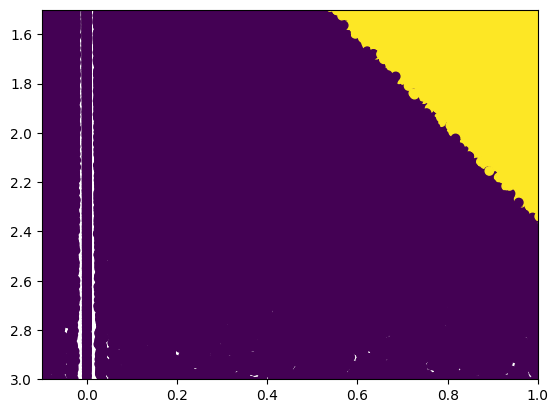

In [25]:
plt.scatter(x=df['seismic_profile_T'], y=df['RMS_amplitude_T'], c=df['kmeans_2'])
plt.xlim(-0.1, 1)
plt.ylim(3, 1.5)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['RMS_amplitude_T', 'first derivative', 'generalized spectral decomposition']])
df['kmeans_2'] = kmeans.labels_
df